In [50]:
#importando as ferramentas
import pandas as pd
import numpy as np

In [51]:
# Define o caminho para o arquivo CSV, nesse caso deve se encontrar na mesma pasta
file_path = 'subscribed_email_audience_export_efc265c2ef.csv'

# Carrega o arquivo CSV
df = pd.read_csv(file_path)

In [52]:
#checar tipos de dados e a contagem de valores nulos
print("Informações do DataFrame original:")
df.info()

print("\nPrimeiras 5 linhas do DataFrame original:")
df.head()

# ADICIONE ESTA LINHA PARA VER OS NOMES EXATOS DAS COLUNAS
print(df.columns)

Informações do DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Email Address  736 non-null    object 
 1   First Name     573 non-null    object 
 2   Last Name      452 non-null    object 
 3   Address        215 non-null    object 
 4   Phone Number   274 non-null    object 
 5   Birthday       1 non-null      object 
 6   MEMBER_RATING  736 non-null    int64  
 7   OPTIN_TIME     736 non-null    object 
 8   OPTIN_IP       521 non-null    object 
 9   CONFIRM_TIME   736 non-null    object 
 10  CONFIRM_IP     0 non-null      float64
 11  LATITUDE       341 non-null    object 
 12  LONGITUDE      341 non-null    object 
 13  GMTOFF         180 non-null    object 
 14  DSTOFF         180 non-null    object 
 15  TIMEZONE       185 non-null    object 
 16  CC             341 non-null    object 
 17  REGION         341 

In [53]:
# Preenche valores ausentes (NaN) com um texto vazio
df[['First Name', 'Last Name', 'Phone Number']] = df[['First Name', 'Last Name', 'Phone Number']].fillna('')

# Padroniza a coluna de Nomes (remove espaços e aplica formato de título)
df['First Name'] = df['First Name'].str.strip().str.title()
df['Last Name'] = df['Last Name'].str.strip().str.title()

# Remove caracteres não numéricos da coluna de Telefone
df['Phone Number'] = df['Phone Number'].str.replace(r'\D', '', regex=True)

# Mostra o resultado da limpeza para confirmar
print("Nomes e Telefones limpos com sucesso.")
df[['First Name', 'Last Name', 'Phone Number']].head()

Nomes e Telefones limpos com sucesso.


,First Name,Last Name,Phone Number
0,Vitoria,Antunes,47988434450
1,Josiane,Froté,22997455076
2,Monique,,
3,,,
4,,,


In [54]:
# Converte a coluna 'OPTIN_TIME' para o tipo datetime
df['OPTIN_TIME'] = pd.to_datetime(df['OPTIN_TIME'], errors='coerce')

# Imprime uma confirmação e as informações da coluna para verificar
print("Coluna de data 'OPTIN_TIME' convertida com sucesso.")
df[['OPTIN_TIME']].info()

Coluna de data 'OPTIN_TIME' convertida com sucesso.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OPTIN_TIME  736 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.9 KB


In [55]:
print("Informações do DataFrame após a limpeza:")
df.info()

print("\nPrimeiras 5 linhas do DataFrame após a limpeza:")
df.head()

Informações do DataFrame após a limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Email Address  736 non-null    object        
 1   First Name     736 non-null    object        
 2   Last Name      736 non-null    object        
 3   Address        215 non-null    object        
 4   Phone Number   736 non-null    object        
 5   Birthday       1 non-null      object        
 6   MEMBER_RATING  736 non-null    int64         
 7   OPTIN_TIME     736 non-null    datetime64[ns]
 8   OPTIN_IP       521 non-null    object        
 9   CONFIRM_TIME   736 non-null    object        
 10  CONFIRM_IP     0 non-null      float64       
 11  LATITUDE       341 non-null    object        
 12  LONGITUDE      341 non-null    object        
 13  GMTOFF         180 non-null    object        
 14  DSTOFF         180 non-null    ob

,Email Address,First Name,Last Name,Address,Phone Number,Birthday,MEMBER_RATING,OPTIN_TIME,OPTIN_IP,CONFIRM_TIME,...,GMTOFF,DSTOFF,TIMEZONE,CC,REGION,LAST_CHANGED,LEID,EUID,NOTES,TAGS
0,viti.antunes@gmail.com,Vitoria,Antunes,NaN,47988434450,NaN,2,2020-06-20 22:54:57,177.94.19.179,2020-06-20 22:54:57,...,NaN,NaN,NaN,NaN,NaN,2020-06-20 22:54:57,403919010,4b0fed2a75,NaN,"""anjos"""
1,josianefrote20@gmail.com,Josiane,Froté,NaN,22997455076,NaN,2,2020-04-11 10:09:41,177.25.83.203,2020-04-11 10:09:41,...,'-3,'-3,america/sao_paulo,br,sp,2020-04-11 10:09:41,381616490,93e5dc7f07,NaN,"""anjos"""
2,monique.farmacia13@gmail.com,Monique,,Belém PA Mangueirão US,,NaN,2,2020-12-18 17:31:49,189.62.47.225,2020-12-18 17:31:49,...,NaN,NaN,NaN,br,sp,2020-12-18 17:31:49,433305174,aadc775b8a,NaN,"""anjos"""
3,manussramos@gmail.com,,,Santos SP US,,NaN,2,2020-10-12 13:49:28,201.95.89.195,2020-10-12 13:49:28,...,NaN,NaN,NaN,NaN,NaN,2020-10-12 13:49:28,431202374,d83a7ac72a,NaN,"""anjos"""
4,dudadutraq@gmail.com,,,Marabá PA US,,NaN,2,2020-10-12 13:10:01,201.95.89.195,2020-10-12 13:10:01,...,NaN,NaN,NaN,NaN,NaN,2020-10-12 13:10:01,431202218,95f20d5934,NaN,"""anjos"""


In [56]:
# df.to_csv('audience_cleaned.csv', index=False)
print("="*60)
print("PROCESSO DE LIMPEZA E PREPARAÇÃO DE DADOS CONCLUÍDO COM SUCESSO!")
print("O DataFrame 'df' está pronto para a fase de análise exploratória e visualização.")
print("="*60)

PROCESSO DE LIMPEZA E PREPARAÇÃO DE DADOS CONCLUÍDO COM SUCESSO!
O DataFrame 'df' está pronto para a fase de análise exploratória e visualização.


In [57]:
# Célula de Setup para Análise
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a aparência dos gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

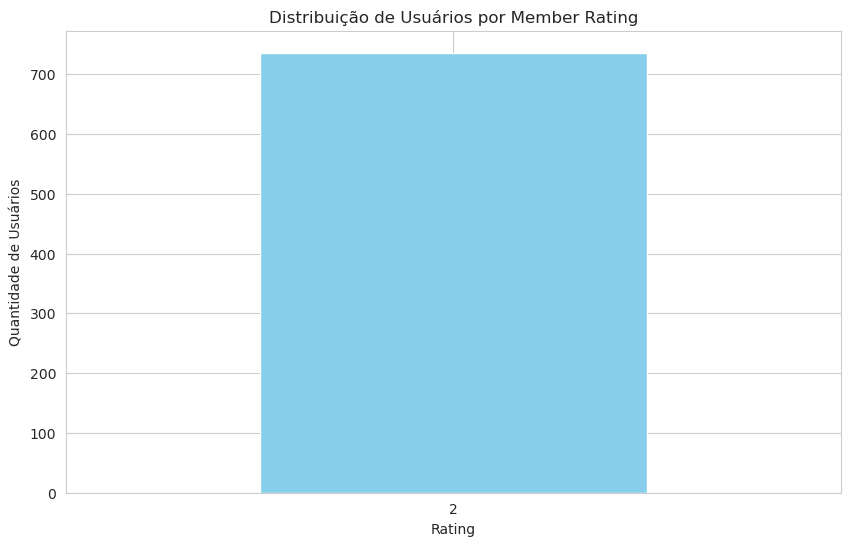

In [58]:
# Contagem de usuários por nível de rating, se são novos (rating 2), engajados (rating 3-4) ou VIPs (rating 5)
rating_counts = df['MEMBER_RATING'].value_counts()

# Gráfico de barras para visualizar a distribuição
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Usuários por Member Rating')
plt.xlabel('Rating')
plt.ylabel('Quantidade de Usuários')
plt.xticks(rotation=0) # Mantém os nomes do eixo X na horizontal
plt.show()

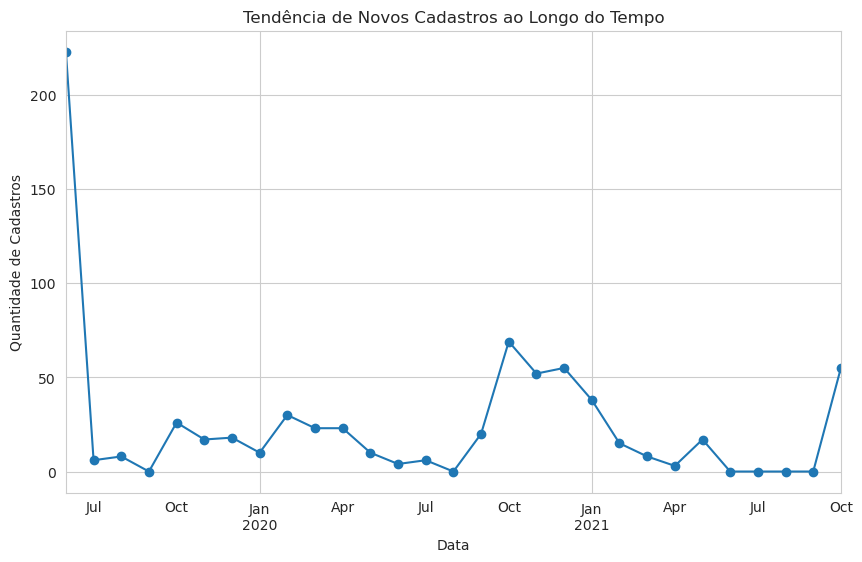

In [59]:
#Analisando tendência e/ou sazonalidade
# Certificando que OPTIN_TIME é do tipo datetime
df['OPTIN_TIME'] = pd.to_datetime(df['OPTIN_TIME'])

# Contando cadastros por mês
cadastros_por_mes = df.set_index('OPTIN_TIME').resample('ME').size()

# Gráfico de linha para visualizar a tendência
cadastros_por_mes.plot(kind='line', marker='o')
plt.title('Tendência de Novos Cadastros ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade de Cadastros')
plt.show()

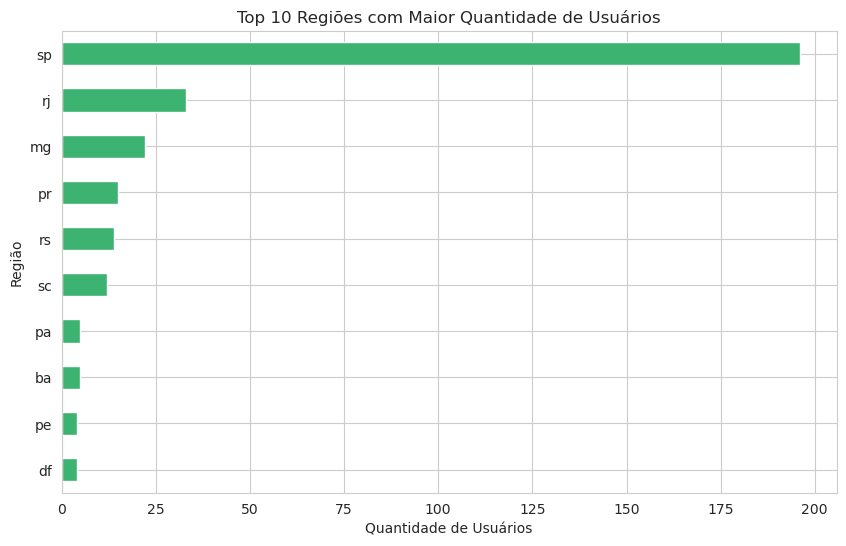

In [60]:
#Análise Geográfica
# Contagem das 10 principais regiões
top_10_regioes = df['REGION'].value_counts().nlargest(10)

# Gráfico de barras horizontais
top_10_regioes.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Regiões com Maior Quantidade de Usuários')
plt.xlabel('Quantidade de Usuários')
plt.ylabel('Região')
plt.show()

In [61]:
# --- CÉLULA DE DIAGNÓSTICO PARA O MAPA DE CALOR ---
import folium
from folium.plugins import HeatMap
import pandas as pd

# Etapa de limpeza que já fizemos
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# Cria o DataFrame geográfico, removendo linhas com coordenadas inválidas
df_geo = df[['LATITUDE', 'LONGITUDE']].dropna()

# --- INÍCIO DO DIAGNÓSTICO ---
print(f"Número de coordenadas válidas encontradas após a limpeza: {len(df_geo)}")

if len(df_geo) > 0:
    print("Amostra das coordenadas que serão plotadas:")
    print(df_geo.head())
else:
    print("\nAVISO: Nenhum dado de geolocalização válido foi encontrado no arquivo.")
    print("Por isso, o mapa de calor não pôde ser gerado.")
# --- FIM DO DIAGNÓSTICO ---


# Cria o mapa base
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Apenas tenta adicionar a camada de calor se houver dados
if not df_geo.empty:
    heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in df_geo.iterrows()]
    HeatMap(heat_data).add_to(mapa)

# Exibe o mapa
mapa

Número de coordenadas válidas encontradas após a limpeza: 0

AVISO: Nenhum dado de geolocalização válido foi encontrado no arquivo.
Por isso, o mapa de calor não pôde ser gerado.
